# Models trained in other deep learning frameworks such as TF/PyTorch

## Using Open CV as an inference engine

Load models trained in other deep learning frameworks such as TenserFlow, Caffe, and PyTorch. We then preprocess the images using blobFromImage and finally pass these blobs through our loaded pretrained model to get our output predictions.

## Overview

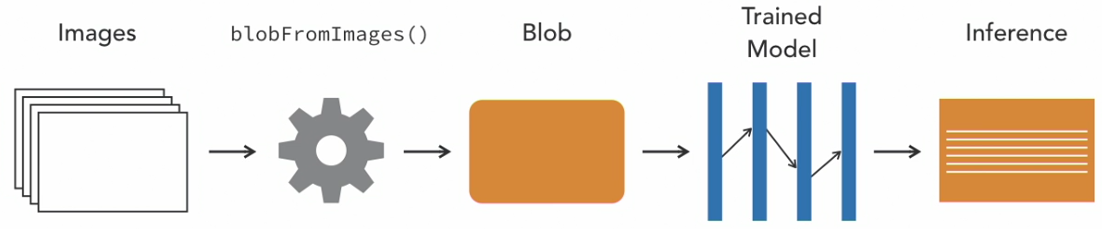

In [1]:
from PIL import Image
Image.open('Images/04-overview.png')

## The dnn Process

readNetFrom, blobFromImage, setInput, and forward are four of the methods that we use in the dnn module. 

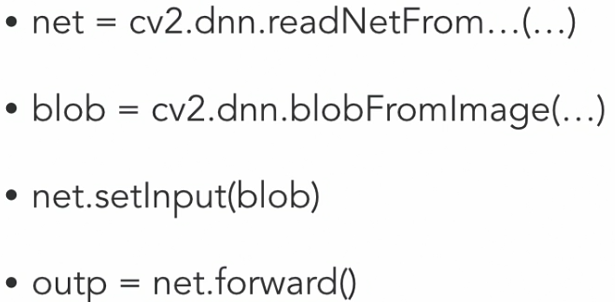

In [2]:
Image.open('Images/05-dnn.png')

### DNN

As Open CV supports models from Caffee, TenserFlow, Torch, DarkNet and models from the omnx format all you need to do is load the models in wait and any configuration files for your use case. 

So readNetFromCaffe takes in as arguments the path to the prottotxt file with text descriptions of the network architecture and the path to the caffeModel file with the train model. 

In [ ]:
cv2.dnn(readNetFromCaffe(prototxt, caffeModel)

So readNetFromCaffe takes in as arguments the path to the prottotxt file with text descriptions of the network architecture and the path to the caffeModel file with the train model. 

### Create a 4-Dimensional Blob

__blobFromImage__ creates a four-dimensional blob from the image and you can optionally resize and crop the image from the center, subtract mean values, scale values by the scale factor, and swap red and blue channels. 

With the __setInput__ method we are setting the blob that we created using the blobFromImage as the input to the network. 

The __forward__ method allows us to do a forward pass through the network to produce an output prediction.

In [ ]:
# Create a 4D blob from the image and resize/crop as needed
blob = cv2.dnn.blobFromImage(image,
                             [scalefactor],
                             [size],
                             [mean],
                             [swapRB],
                             [crop],
                             [ddepth])

# Set the blob that we created using the blobFromImage as the input to the network
net.setInput(blob)

# Do a forward pass through the network to product an output
outp = net.forward() 

------

## Working with blobs

Now a __blob__ is one or more images with the same width, height, and number of channels that have all been preprocessed in the same way. Let's take a look at the workflow for an inference engine and where blobFromImage fits in.

What we will do is pass one image to blobFromImage. Now if you have more than one image, you'll use the __blobFromImages__ vs __blobFromImage__ function. 

### 4D Tensor (NCHW)
The output of this is a four dimensional tensor where N is the number of images, C is the number of channels, H is the height of the tensor, and W is the width of the tensor. This is stored in a blob object. This is then passed to a trained model that allows us to get the image or video inference. 


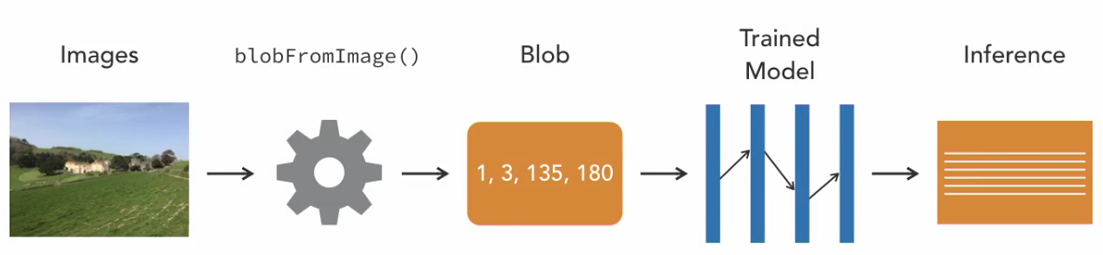

In [6]:
Image.open('Images/06-overview2.png')

 Let's take a look at the parameters for blobFromImage. BlobFromImage creates a four dimensional blob from an image and you can optionally resize and crop an image from the center, you can subtract mean values, and so on. 

In [ ]:
# Create 4D blob using blobFromImage()
blob = cv2.dnn.blobFromImage(image,
                             scalefactor,
                             size,
                             mean,
                             swapRB,
                             crop,
                             ddepth)

### Parameters

#### Image
The input image is the one we'll be passing through our neural network; input image (1, 3, or 4 channels)

#### Scalefactor
The scalefactor allows you to optionally increase or decrease the size of the image by a certain factor. 

#### size
The size refers to the size of the image the neural network expects. For many well known models, this could be 224 by 224. So it's important to use whatever was specified for the pre-trained model that you use. 

#### mean
The mean refers to values for R, G, and B that must be subtracted for each channel. You see, not all deep learning architectures perform mean subtraction and scaling. So check if this is required and what the values are for any pre-trained model you might use. 

#### swapRB
SwapRB is about swapping the first and last channel. 

#### crop
Crop is whether an image will be cropped after resize and cropping is not performed by default. 

#### ddepth
Ddepth is the depth of the output blob and by default we use CV_32F or CV_8U